<a href="https://colab.research.google.com/github/omkardesai98/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -Sumit Berde
##### **Team Member 2 -Omkar Desai

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [107]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [109]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cohort-chicago/Capston Project ML 2/data_cardiovascular_risk.csv')

### Dataset First View

In [110]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [111]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [112]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [113]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [114]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

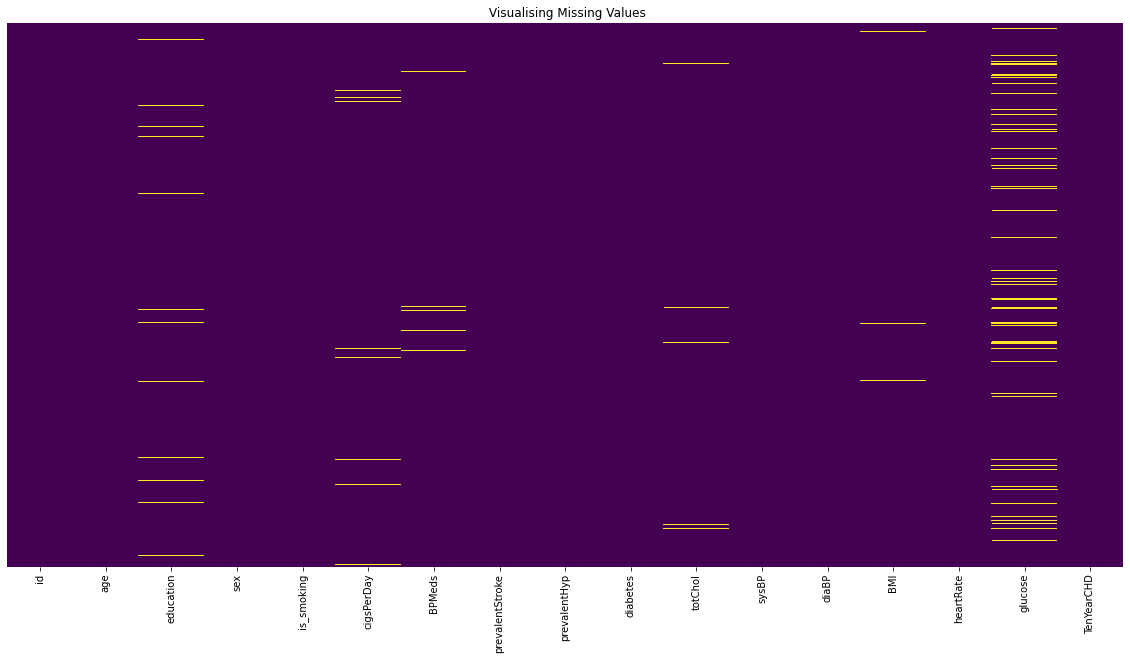

In [115]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

This dataset contain information of patients such as information about patients age,id,sex,is_smoking etc. it include 3390 records and 17 features.It have 0 duplicate rows and also some columns including education,cigsPerDay,BPMeds,totChol,glucose have some null values.  

## ***2. Understanding Your Variables***

In [116]:
# Dataset Columns
print(df.columns)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [117]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [118]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'unique values in {i} are : {df[i].nunique()}')

unique values in id are : 3390
unique values in age are : 39
unique values in education are : 4
unique values in sex are : 2
unique values in is_smoking are : 2
unique values in cigsPerDay are : 32
unique values in BPMeds are : 2
unique values in prevalentStroke are : 2
unique values in prevalentHyp are : 2
unique values in diabetes are : 2
unique values in totChol are : 240
unique values in sysBP are : 226
unique values in diaBP are : 142
unique values in BMI are : 1259
unique values in heartRate are : 68
unique values in glucose are : 132
unique values in TenYearCHD are : 2


AS 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [119]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [120]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [121]:
df.drop(['id','education'],axis =1,inplace=True)

###  Categorical Encoding

In [122]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have use label encoding.we use this techniques so that we can feed our model only numerical values.

In [123]:
df.shape

(3390, 15)

### Handling missing values

In [124]:
# creating list of missing values columns
missing_val_col_lst = []
for i in df.columns:
  if df[i].isnull().sum()>0:
    missing_val_col_lst.append(i)
  

In [125]:
print(missing_val_col_lst)

['cigs_per_day', 'bp_meds', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose']


In [126]:
# replacing the missing values in bp_meds by
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [127]:
df['cigs_per_day'].isna().sum()

22

In [128]:
#checking the median and mean of the cigs_per_day column when excluding non smokers
print('median of cig_per_day is :',df[df['is_smoking']==1]['cigs_per_day'].median())
print('mean of cig_per_day is :',df[df['is_smoking']==1]['cigs_per_day'].mean())

median of cig_per_day is : 20.0
mean of cig_per_day is : 18.345945945945946


In [129]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]

,age,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


In [130]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,age,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


**as there are no wrong entries in these columns.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


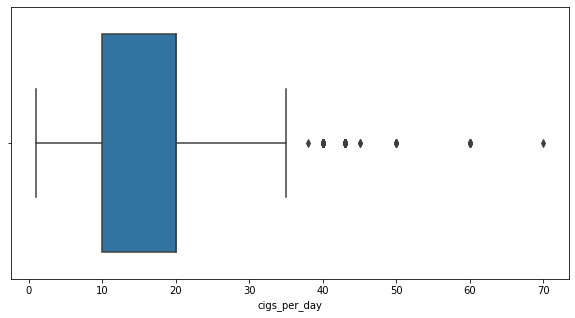

In [131]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])

In [132]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


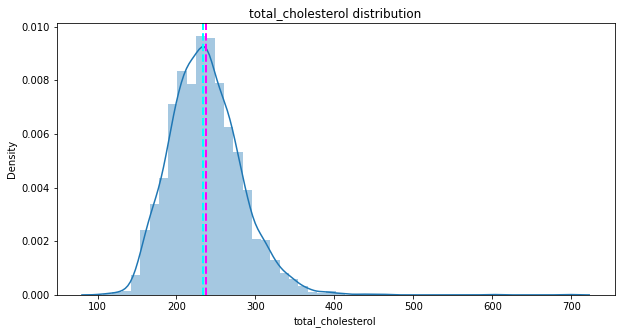

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


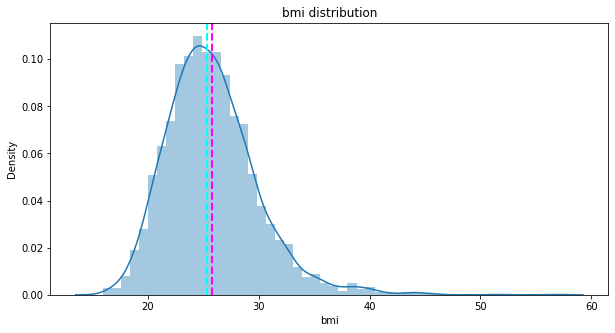

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


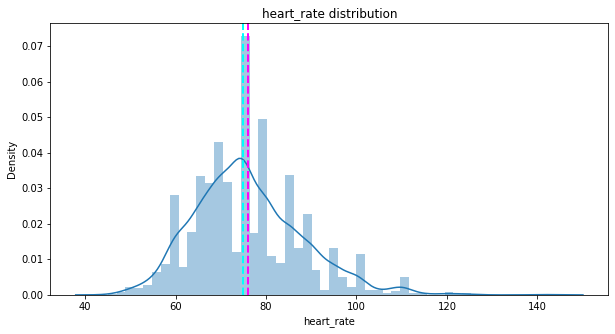

In [133]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

In [134]:
#printing mean and median 
for i in ['total_cholesterol','bmi','heart_rate']:
  print(f'mean for {i} is : {df[i].mean()} , and median is {df[i].median()}')

mean for total_cholesterol is : 237.07428400954655 , and median is 234.0
mean for bmi is : 25.7949644549763 , and median is 25.38
mean for heart_rate is : 75.97727943346119 , and median is 75.0


In [135]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

**Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.**

In [136]:
# total missing values in glucose
df.glucose.isna().sum()

304

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


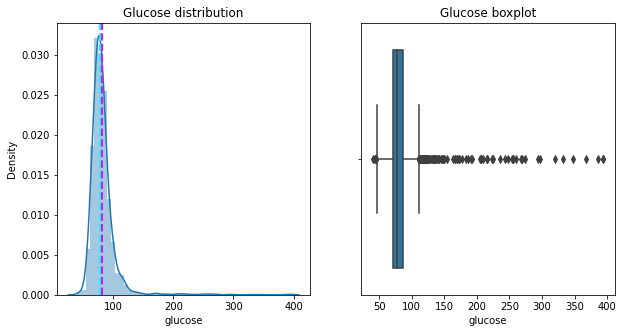

In [137]:
# distribution of glucose
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')

plt.subplot(1,2,2)
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')
plt.show()

* The distribution is positively skewed, with outliers.
* There are **304** missing values in the glucose column. **If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.**
* **To avoid this we can impute the missing values using KNN imputer.**
* If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [138]:
#checking mean median and mode of glucose column before knnimputer
print(f'mean is : {df.glucose.mean()}')
print(f'median is : {df.glucose.median()}')
print(f'mode is : {df.glucose.mode()}')

mean is : 82.08651976668827
median is : 78.0
mode is : 0    75.0
dtype: float64


In [139]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [140]:
#checking mean median and mode of glucose column after knnimputer
print(f'mean is : {df.glucose.mean()}')
print(f'median is : {df.glucose.median()}')
print(f'mode is : {df.glucose.mode()}')

mean is : 82.04150442477876
median is : 78.0
mode is : 0    75.0
dtype: float64


**After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.**

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   sex                3390 non-null   float64
 2   is_smoking         3390 non-null   float64
 3   cigs_per_day       3390 non-null   float64
 4   bp_meds            3390 non-null   float64
 5   prevalent_stroke   3390 non-null   float64
 6   prevalent_hyp      3390 non-null   float64
 7   diabetes           3390 non-null   float64
 8   total_cholesterol  3390 non-null   float64
 9   systolic_bp        3390 non-null   float64
 10  diastolic_bp       3390 non-null   float64
 11  bmi                3390 non-null   float64
 12  heart_rate         3390 non-null   float64
 13  glucose            3390 non-null   float64
 14  ten_year_chd       3390 non-null   float64
dtypes: float64(15)
memory usage: 397.4 KB


The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [142]:
# changing datatypes
df = df.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [143]:
# checking for missing values
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [186]:
# Handling Missing Values & Missing Value Imputation

### 2. Handling Outliers

In [190]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [171]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [172]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [173]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [174]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [175]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [176]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [177]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [178]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [179]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [180]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [181]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [182]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [183]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [184]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [185]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [187]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [188]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [189]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### What all manipulations have you done and insights you found?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [144]:
# Expand Contraction

#### 2. Lower Casing

In [145]:
# Lower Casing

#### 3. Removing Punctuations

In [146]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [147]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [148]:
# Remove Stopwords

In [149]:
# Remove White spaces

#### 6. Rephrase Text

In [150]:
# Rephrase Text

#### 7. Tokenization

In [151]:
# Tokenization

#### 8. Text Normalization

In [152]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [153]:
# POS Taging

#### 10. Text Vectorization

In [154]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [155]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [156]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [157]:
# Transform Your data

### 6. Data Scaling

In [158]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [159]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [160]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [161]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [162]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [163]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [164]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [165]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [166]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [167]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [168]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [169]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [170]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***